## Lesion detection

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import os
import cv2

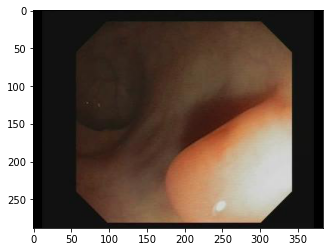

In [7]:
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [20]:
# Helper Functions to transform the data
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    return image

def grayscale(img):
    #Applies the Grayscale transform
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    #Applies a Gaussian Noise kernel
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    

### Save Each Filepath and Filename into List for Each Image

In [10]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for filepath in filepath_list:
    print(filepath)

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9733.jpg', '9733.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/14147.jpg', '14147.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/63.jpg', '63.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6400.jpg', '6400.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24084.jpg', '24084.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/13628.jpg', '13628.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23933.jpg', '23933.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12536.jpg', '12536.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/823.jpg', '823.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15259.jpg', '15259.jpg']
['/Users/shreyahunur/Desktop/257/F

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/25004.jpg', '25004.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6946.jpg', '6946.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7480.jpg', '7480.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12870.jpg', '12870.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23475.jpg', '23475.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/565.jpg', '565.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/28520.jpg', '28520.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27613.jpg', '27613.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/19925.jpg', '19925.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/5297.jpg', '5297.jpg']
['/Users/shreyahunur/Desktop/2

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27818.jpg', '27818.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/11372.jpg', '11372.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/3635.jpg', '3635.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6995.jpg', '6995.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15114.jpg', '15114.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/8760.jpg', '8760.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7453.jpg', '7453.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/22960.jpg', '22960.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1022.jpg', '1022.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/13565.jpg', '13565.jpg']
['/Users/shreyahunur/Desktop/2

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24018.jpg', '24018.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9963.jpg', '9963.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/25312.jpg', '25312.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/13878.jpg', '13878.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7796.jpg', '7796.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23763.jpg', '23763.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6488.jpg', '6488.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/673.jpg', '673.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27505.jpg', '27505.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/16900.jpg', '16900.jpg']
['/Users/shreyahunur/Desktop/2

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/5784.jpg', '5784.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/21771.jpg', '21771.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9801.jpg', '9801.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/25270.jpg', '25270.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23601.jpg', '23601.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/711.jpg', '711.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1285.jpg', '1285.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27467.jpg', '27467.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/28754.jpg', '28754.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/16862.jpg', '16862.jpg']
['/Users/shreyahunur/Desktop/2

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/22320.jpg', '22320.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24751.jpg', '24751.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/14692.jpg', '14692.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/18080.jpg', '18080.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27270.jpg', '27270.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/28143.jpg', '28143.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/3285.jpg', '3285.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/21601.jpg', '21601.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/22308.jpg', '22308.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/14862.jpg', '14862.jpg']
['/Users/shreyahunur/D

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23637.jpg', '23637.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24158.jpg', '24158.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/727.jpg', '727.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/16854.jpg', '16854.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/28762.jpg', '28762.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27451.jpg', '27451.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/17592.jpg', '17592.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/26997.jpg', '26997.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/2962.jpg', '2962.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/21020.jpg', '21020.jpg']
['/Users/shreyahunur/Deskt

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12238.jpg', '12238.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/25494.jpg', '25494.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15557.jpg', '15557.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/8323.jpg', '8323.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7010.jpg', '7010.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24952.jpg', '24952.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/4519.jpg', '4519.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/11731.jpg', '11731.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/3276.jpg', '3276.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/27283.jpg', '27283.jpg']
['/Users/shreyahunur/Desktop

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/17970.jpg', '17970.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/19785.jpg', '19785.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/22713.jpg', '22713.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/8913.jpg', '8913.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1089.jpg', '1089.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24362.jpg', '24362.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12808.jpg', '12808.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6080.jpg', '6080.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15801.jpg', '15801.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/24404.jpg', '24404.jpg']
['/Users/shreyahunur/Deskt

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9739.jpg', '9739.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/69.jpg', '69.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1365.jpg', '1365.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/13622.jpg', '13622.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23939.jpg', '23939.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/25390.jpg', '25390.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15253.jpg', '15253.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/8427.jpg', '8427.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/829.jpg', '829.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7714.jpg', '7714.jpg']
['/Users/shreyahunur/Desktop/257/Final

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9112.jpg', '9112.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/15478.jpg', '15478.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12317.jpg', '12317.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/12471.jpg', '12471.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/23874.jpg', '23874.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/7659.jpg', '7659.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/964.jpg', '964.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/6547.jpg', '6547.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/14000.jpg', '14000.jpg']
['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/9674.jpg', '9674.jpg']
['/Users/shreyahunur/Desktop/257

### Read and Save Each Image into Image List

In [11]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (500, 574, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <clas

This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (576, 768, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (464, 592, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (448, 544, 3)
This image is: <clas

### Read and display one image 

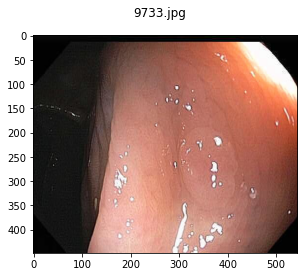

In [12]:
for image, filepath in zip(image_list, filepath_list):
    plt.figure()
    plt.suptitle(filepath[1])
    plt.imshow(image)
    break

### Convert each image to grayscale

In [18]:
gray_image_list = []
for image in image_list:
    gray_img = grayscale(image)
    gray_image_list.append(gray_img)

### Display grayscale image

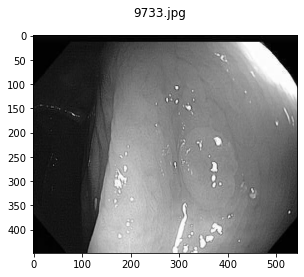

In [19]:
for gray_image, filepath in zip(gray_image_list, filepath_list):
    plt.figure()
    plt.suptitle(filepath[1])
    plt.imshow(gray_image, cmap = 'gray')
    break

### Apply Gaussian Smoothing to Each Gray Image

In [21]:
blur_gray_image_list = []
kernel_size = 7
for gray_image in gray_image_list:
    blur_gray_image = gaussian_blur(gray_image, kernel_size)
    blur_gray_image_list.append(blur_gray_image)

### Display the Gaussian Smoothed Image

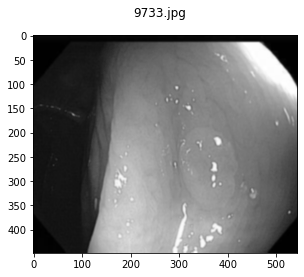

In [22]:
for blur_gray_image, filepath in zip(blur_gray_image_list, filepath_list):
    plt.figure()
    plt.suptitle(filepath[1])
    plt.imshow(blur_gray_image, cmap = 'gray')
    break